# Домашнее задание 2 (5 баллов).

Все задания ниже имеют равный вес (5/16).

In [2]:
import pandas as pd
from google.colab import files
from pathlib import Path
import numpy as np

titanik_url = "https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/seminars/sem03_pandas/titanic_train.csv"
hashes_url =  "https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/seminars/sem03_pandas/hashes.csv"
grages_url = "https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/seminars/sem03_pandas/grades.csv"
students_path = Path("/content/")

#### Описание данных

В папке Dat (https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/Data.zip) находится информация о студентах. Всего 10 групп студентов. Файлы делятся на две категории:
    * Students_info_i - информация о студентах из группы i
    * Students_marks_i - оценки студентов из группы i за экзамены

### Одно из важных достоинств pandas $-$ это удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц: merge, join, concat. Наличие готовых методов позволяет не реализовывать самостоятельно поэлементную обработку данных и оперировать сразу целыми таблицами данных.

Подробно об этих методах посмотрите тут: https://www.kaggle.com/residentmario/renaming-and-combining#Combining

#### Задание 1. Соберите всю информацию о студентах в одну таблицу df. В получившейся таблице должна быть информация и оценки всех студентов из всех групп. Напечатайте несколько строк таблицы для демонстрации результата.¶

In [3]:
#your code here
df1= pd.concat([pd.read_csv(f) for f in students_path.glob("Students_info_*.csv")])
df2= pd.concat([pd.read_csv(f) for f in students_path.glob("Students_marks_*.csv")])


In [4]:
df1.loc[df1["index"]==4]

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group
4,4,male,group C,some college,standard,none,group1


In [5]:
df2

,index,math score,reading score,writing score
0,0,72,72,74
1,1,69,90,88
2,2,90,95,93
3,3,47,57,44
4,4,76,78,75
...,...,...,...,...
95,395,48,45,41
96,396,50,67,63
97,397,85,89,95
98,398,74,63,57


In [6]:
X= pd.merge(df1,df2,how="outer")
X.head(505)

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,500,female,group D,master's degree,standard,none,group6,74,79,82
1,501,female,group B,associate's degree,standard,completed,group6,94,87,92
2,502,male,group C,some college,free/reduced,none,group6,63,61,54
3,503,female,group E,associate's degree,standard,completed,group6,95,89,92
4,504,female,group D,master's degree,free/reduced,none,group6,40,59,54
...,...,...,...,...,...,...,...,...,...,...
500,0,female,group B,bachelor's degree,standard,none,group1,72,72,74
501,1,female,group C,some college,standard,completed,group1,69,90,88
502,2,female,group B,master's degree,standard,none,group1,90,95,93
503,3,male,group A,associate's degree,free/reduced,none,group1,47,57,44


#### Задание 2. Удалите столбец index у полученной таблицы. Напечатайте первые 10 строк таблицы.

In [7]:
X.drop("index",axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,female,group D,master's degree,standard,none,group6,74,79,82
1,female,group B,associate's degree,standard,completed,group6,94,87,92
2,male,group C,some college,free/reduced,none,group6,63,61,54
3,female,group E,associate's degree,standard,completed,group6,95,89,92
4,female,group D,master's degree,free/reduced,none,group6,40,59,54
...,...,...,...,...,...,...,...,...,...
995,male,group A,high school,free/reduced,none,group4,48,45,41
996,female,group B,high school,free/reduced,none,group4,50,67,63
997,female,group C,associate's degree,standard,none,group4,85,89,95
998,male,group B,some high school,standard,none,group4,74,63,57


#### Задание 3. Выведите на экран размеры полученной таблицы

In [8]:
X.shape

(1000, 10)

#### Задание 4. Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [9]:
X.describe(include = "all")

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
count,1000.000000,1000,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,NaN,2,5,6,2,2,10,NaN,NaN,NaN
top,NaN,female,group C,some college,standard,none,group6,NaN,NaN,NaN
freq,NaN,518,319,226,645,642,100,NaN,NaN,NaN
mean,499.500000,NaN,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,288.819436,NaN,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,249.750000,NaN,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,499.500000,NaN,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,749.250000,NaN,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


#### Задание 5. Проверьте, есть ли в таблице пропущенные значения

In [10]:
# your code here
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test preparation course      1000 non-null   object
 6   group                        1000 non-null   object
 7   math score                   1000 non-null   int64 
 8   reading score                1000 non-null   int64 
 9   writing score                1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [11]:
X = X.drop(["index"],axis=1)

In [12]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,female,group D,master's degree,standard,none,group6,74,79,82
1,female,group B,associate's degree,standard,completed,group6,94,87,92
2,male,group C,some college,free/reduced,none,group6,63,61,54
3,female,group E,associate's degree,standard,completed,group6,95,89,92
4,female,group D,master's degree,free/reduced,none,group6,40,59,54
...,...,...,...,...,...,...,...,...,...
995,male,group A,high school,free/reduced,none,group4,48,45,41
996,female,group B,high school,free/reduced,none,group4,50,67,63
997,female,group C,associate's degree,standard,none,group4,85,89,95
998,male,group B,some high school,standard,none,group4,74,63,57


#### Задание 6. Выведите на экран средние баллы студентов по каждому предмету (math, reading, writing)

In [13]:
# your code here
X.groupby(by = "group").mean(numeric_only = True).sort_values(by = "math score",ascending= False)

,math score,reading score,writing score
group,,,
group3,68.26,69.49,68.32
group2,67.94,70.81,69.57
group5,67.46,69.33,68.57
group7,67.27,70.97,69.72
group9,66.52,69.06,68.12
group10,66.48,69.92,69.35
group6,66.23,70.15,68.73
group8,65.82,69.15,68.19
group4,64.28,68.25,66.71


**Задание 7. Как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (test preparation course)? Выведите на экран для каждого предмета в отдельности средний балл студентов, проходивших курс для подготовки к экзамену и не проходивших курс.**

In [14]:
# your code here
X.groupby("test preparation course").mean(numeric_only = True)

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


**Задание 8. Выведите на экран все различные значения из столбца lunch.**

In [15]:
# your code here
X["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

**Задание 9. Переименуйте колонку "parental level of education" в "education", а "test preparation course" в "test preparation" с помощью метода pandas rename**
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [16]:
# your code here
X.rename(columns={"parental level of education":"education","test preparation course":"test preparation"})

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score
0,female,group D,master's degree,standard,none,group6,74,79,82
1,female,group B,associate's degree,standard,completed,group6,94,87,92
2,male,group C,some college,free/reduced,none,group6,63,61,54
3,female,group E,associate's degree,standard,completed,group6,95,89,92
4,female,group D,master's degree,free/reduced,none,group6,40,59,54
...,...,...,...,...,...,...,...,...,...
995,male,group A,high school,free/reduced,none,group4,48,45,41
996,female,group B,high school,free/reduced,none,group4,50,67,63
997,female,group C,associate's degree,standard,none,group4,85,89,95
998,male,group B,some high school,standard,none,group4,74,63,57


**Зафиксируем минимальный балл для сдачи экзамена**

In [17]:
passmark = 50

**Задание 10. Ответьте на вопросы:**
    * Какая доля студентов сдала экзамен по математике (passmark >= 50)?
    * Какая доля студентов, проходивших курс подготовки к экзамену, сдала экзамен по математике?
    * Какая доля женщин, не проходивших курс подготовки к экзамену, не сдала экзамен по математике?

In [18]:
# your code here
X["math score"][X["math score"]>=passmark].count()

865

**Задание 11. С помощью groupby выполните задания ниже. Также выведите время выполнения каждого из заданий.**
    * Для каждой этнической группы выведите средний балл за экзамен по чтению
    * Для каждого уровня образования выведите минимальный балл за экзамен по письму

In [19]:
%time
X.groupby("race/ethnicity")["reading score"].mean(numeric_only=True)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 14.1 µs


race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64

In [20]:
%time
X.groupby("parental level of education")["writing score"].min(numeric_only = True)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


parental level of education
associate's degree    35
bachelor's degree     38
high school           15
master's degree       46
some college          19
some high school      10
Name: writing score, dtype: int64

**Задание 12. Выполните задание 11 с помощью циклов. Сравните время выполнения.**

In [21]:
%time
mass = [0,0,0,0,0]
col = [0,0,0,0,0]
d = {"group A":0,"group B":1,"group C":2,"group D":3,"group E":4}

for i in X.itertuples():
  #print(i[2])
  mass[d[i[2]]]+=i[8]
  col[d[i[2]]]+=1

d= np.array(mass)
d= d/col
mass,d

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


([5756, 12797, 22044, 18348, 10224],
 array([64.6741573 , 67.35263158, 69.10344828, 70.03053435, 73.02857143]))

In [22]:
%time
mass = [100,100,100,100,100,100]

d = {"associate's degree":0,"bachelor's degree":1,"high school":2,"master's degree":3,"some college":4,"some high school":5}

for i in X.itertuples():
  #print(i[2])
  if(mass[d[i[3]]]>i[9]):
    mass[d[i[3]]]=i[9]



mass

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


[35, 38, 15, 46, 19, 10]

**Задание 13. Выведите на экран средние баллы студентов по каждому предмету в зависимости от пола и уровня образования. То есть должно получиться количество групп, равных 2 * (число уровней образования), и для каждой такой группы выыведите средний балл по каждому из предметов.**

Это можно сделать с помощью сводных таблиц (pivot_table):

https://www.kaggle.com/kamilpolak/tutorial-how-to-use-pivot-table-in-pandas

<Axes: xlabel='gender,parental level of education'>

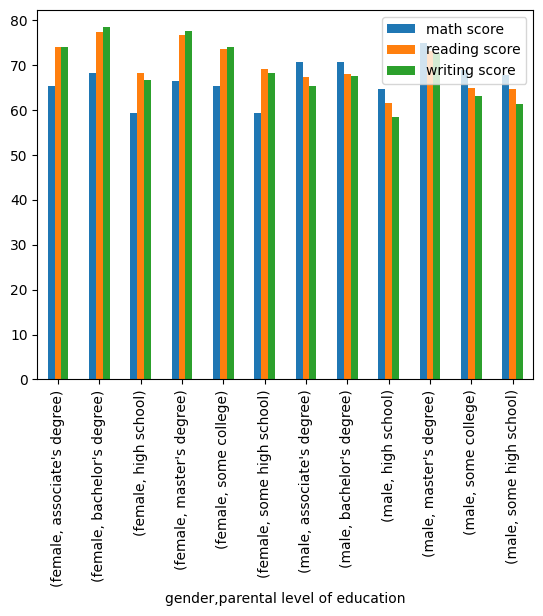

In [23]:
X.pivot_table(["math score","writing score","reading score"],["gender","parental level of education"]).plot(kind="bar",)

In [24]:
X[X["parental level of education"]=="associate's degree"].mean(numeric_only=True)

math score       67.882883
reading score    70.927928
writing score    69.896396
dtype: float64

#### Задание 14. Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице df под названием Math_PassStatus и запишите в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

Сделайте аналогичные шаги для экзаменов по чтению и письму.

In [29]:
X["Math_PassStatus"] = X["math score"].apply(lambda x: "P" if x>passmark else "F")

In [35]:
X[X["Math_PassStatus"]=="P"].count()

gender                         850
race/ethnicity                 850
parental level of education    850
lunch                          850
test preparation course        850
group                          850
math score                     850
reading score                  850
writing score                  850
Math_PassStatus                850
dtype: int64

In [36]:
X["Reading_PassStatus"] = X["reading score"].apply(lambda x: "P" if x>passmark else "F")
X["Writing_PassStatus"] = X["writing score"].apply(lambda x: "P" if x>passmark else "F")
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus
0,female,group D,master's degree,standard,none,group6,74,79,82,P,P,P
1,female,group B,associate's degree,standard,completed,group6,94,87,92,P,P,P
2,male,group C,some college,free/reduced,none,group6,63,61,54,P,P,P
3,female,group E,associate's degree,standard,completed,group6,95,89,92,P,P,P
4,female,group D,master's degree,free/reduced,none,group6,40,59,54,F,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...
995,male,group A,high school,free/reduced,none,group4,48,45,41,F,F,F
996,female,group B,high school,free/reduced,none,group4,50,67,63,F,P,P
997,female,group C,associate's degree,standard,none,group4,85,89,95,P,P,P
998,male,group B,some high school,standard,none,group4,74,63,57,P,P,P


#### Задание 15. Сколько студентов успешно сдали все экзамены?

Создайте столбец OverAll_PassStatus и запишите в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитайте количество студентов, которые сдали все экзамены.

In [45]:
X["OverAll_PassStatus"]= X.apply(lambda x: "P" if x["Math_PassStatus"]=="P" and x["Writing_PassStatus"]=="P" and x["Reading_PassStatus"]=="P" else "F",axis=1)
X[X["OverAll_PassStatus"]=="P"].count()

gender                         796
race/ethnicity                 796
parental level of education    796
lunch                          796
test preparation course        796
group                          796
math score                     796
reading score                  796
writing score                  796
Math_PassStatus                796
Reading_PassStatus             796
Writing_PassStatus             796
OverAll_PassStatus             796
dtype: int64

#### Задание 16. Переведем баллы в оценки

### Система перевода баллов в оценки
####    больше 90 = A
####      80-90 = B
####      70-80 = C
####      60-70 = D
####      50-60 = E
####    меньше 50 = F (Fail)

Создайте вспомогательную функцию, которая будет по среднему баллу за три экзамена выставлять оценку студенту по данным выше критериям.

Создайте столбец Grade и запишите в него оценку каждого студента.

Выведите количество студентов, получивших каждую из оценок.

**В случае, если средний балл попадает на границу между оценками (т.е. равен ровно 60, 70 или 80 баллов), вы можете интерпретировать условие на своё усмотрение (т.е. можете поставить за 60 баллов оценку D, а можете - E).**

In [51]:
def GetGrade(average_mark):
    # your code here
    if average_mark< 50:
      return "F"
    if average_mark <60:
      return "E"
    if average_mark < 70:
      return "D"
    if average_mark < 80:
      return "C"
    if average_mark < 90:
      return "B"
    if average_mark <=100:
      return "A"

# your code here

In [52]:
X["Summ_score"] = (X["math score"]+X["writing score"]+X["reading score"])/3
X["Grade"] = X["Summ_score"].apply(GetGrade)

In [60]:
X.groupby(["Grade"]).count()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Summ_score
Grade,,,,,,,,,,,,,,
A,52,52,52,52,52,52,52,52,52,52,52,52,52,52
B,146,146,146,146,146,146,146,146,146,146,146,146,146,146
C,261,261,261,261,261,261,261,261,261,261,261,261,261,261
D,256,256,256,256,256,256,256,256,256,256,256,256,256,256
E,182,182,182,182,182,182,182,182,182,182,182,182,182,182
F,103,103,103,103,103,103,103,103,103,103,103,103,103,103
